# Importing the data
- importing topics in json file
- import book df 

In [1]:
import pandas as pd 
import json
import numpy as np
pd.set_option('display.max_columns',100)


### Import good reads book from pickle

In [2]:
mybooks = pd.read_pickle('assets/my_books.pkl')

# # filer only books I have read
myreads = mybooks.query('Exclusive_Shelf == "read"')
to_read = mybooks.query("Exclusive_Shelf == 'to-read'")

# Fill missing date read with date added
myreads['Date_Read'] = myreads['Date_Read'].fillna(myreads['Date_Added'].copy())
myreads = myreads.sort_values(by='Date_Read')

/var/folders/v0/_5v45j6d3wg4y2hgk4psz0sm0000gn/T/ipykernel_62480/635520379.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  myreads['Date_Read'] = myreads['Date_Read'].fillna(myreads['Date_Added'].copy())


### Import topics dict from json file

In [3]:
import json

# Load JSON data from a file
with open('assets/my_topics.json') as file:
    json_data = json.load(file)

# Convert JSON data to a dictionary
my_topics = dict(json_data)

In [4]:
# creating dictionaries for read and want-to-read books
my_read_topics = {k: v for k, v in my_topics.items() if k in myreads.Title.to_list()}
my_want_titles = list(set(list(my_topics.keys())) - set(myreads.Title.to_list()))
my_want_topics = {k: v for k, v in my_topics.items() if k in my_want_titles}

# Topics visualization 

In [5]:
from apps.viz import tree_topics

In [6]:
fig = tree_topics(my_read_topics)
fig.show()

# vizualising publication year

In [7]:
from apps.viz import viz_pub_year
fig = viz_pub_year(myreads)
fig.show()

# Vizualising timeline of books read. 

In [8]:
from apps.viz import viz_year_read
viz_year_read(myreads).show()

# Number of pages and read count

Visualising the most read page count of books

In [9]:
from apps.viz import visualize_page_categories

# Assuming you have a DataFrame 'myreads' with 'Page_Cat' column

visualize_page_categories(myreads, 'Page_Cat')



# Vizualise top categories and languages
I am using a pie chart here because I excpect few values in each variable and a large discrepancy.

In [10]:
from apps.viz import viz_top_values

In [11]:
viz_top_values(mybooks['Language'], top_n=5)

In [12]:
viz_top_values(mybooks['Categories'], top_n=10)

## Rating visualised 

In [13]:
from apps.viz import book_ratings
# Call the function for top-rated books
fig_top_rated = book_ratings(myreads, 'Top Rated Books', top_rated=True)

# Call the function for bottom-rated books
fig_bottom_rated = book_ratings(myreads, 'Bottom Rated Books', top_rated=False)

# Show both figures
fig_top_rated.show()
fig_bottom_rated.show()



In [14]:


from apps.viz import create_rating_table

# Call the function to create the rating table
rating_table = create_rating_table(myreads)

# Display the table
rating_table.show()


In [15]:
from apps.viz import create_author_table
# Call the function to create the author table
author_table = create_author_table(myreads)

# Display the table
author_table.show()

# This year in books

In [16]:
from datetime import datetime
datetime.today().year

2023

In [17]:
# Filter on books read this year using datetime to find todays year
from datetime import datetime
today_year = datetime.today().year
print(f"This year you have read {len(myreads.query('Year == @today_year'))} books. Totaling {f'{(myreads.Number_of_Pages.sum().astype(int)):,}'} pages read.")

This year you have read 51 books. Totaling 62,094 pages read.


# Word cloud from Goodreads book Description

In [18]:

import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

In [19]:
STOPWORDS.update({'Author', 'S', 'will','New','York','Time','book','novel', 'read', 'day', 'make','year', 'one', 'times', 'Times, of', 's', 'award','author','new','york','selling','story','t','1','og'})

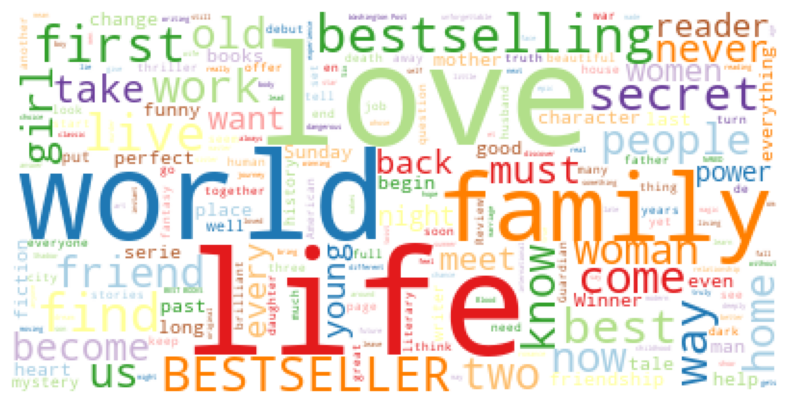

In [20]:
# Drop the rows with null values in the 'Description' column
descriptions = mybooks['Description'].dropna()
# Create the WordCloud
plt.figure(figsize=(10, 5))  # Adjust the width and height as needed
wc = WordCloud(
    background_color='white',
    stopwords=STOPWORDS,
    contour_width=2,
    contour_color='white',
    colormap='Paired'
).generate(' '.join(descriptions))

plt.axis("off")
plt.imshow(wc)
plt.show()

In [25]:
from wordcloud import WordCloud, STOPWORDS
import numpy as np
import plotly.express as px
import re
from collections import Counter

def desc_tree(Description):

    STOPWORDS.update({'Author', 'S', 'will','New','York','Time','book','novel', 'read', 'day', 'make','year', 'one', 'times', 'Times, of', 's', 'award','author','new','york','selling','story','t','1','og'})
    
    descriptions_all = ' '.join(Description.dropna()).lower()

    descriptions_all = re.findall(r'\b\w+\b', descriptions_all.lower())

    # Remove stop words from the list of words
    filtered_words = [word for word in descriptions_all if word not in STOPWORDS]

    word_counts = Counter(filtered_words)

    # Create a DataFrame from the word counts
    word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])
    # Create a tree map using Plotly Express
    fig = px.treemap(word_counts_df.sort_values(by='Count', ascending=False).head(55), path=['Word'], values='Count')

    # Update the layout of the tree map
    fig.update_layout(
        title='Most common words found in book descriptions',
    )
    return fig

desc_tree(mybooks['Description'])

In [21]:
descriptions_all = ' '.join(mybooks['Description'].dropna()).lower()

import re
descriptions_all = re.findall(r'\b\w+\b', descriptions_all.lower())

# Remove stop words from the list of words
filtered_words = [word for word in descriptions_all if word not in STOPWORDS]

from collections import Counter
word_counts = Counter(filtered_words)

# Create a DataFrame from the word counts
word_counts_df = pd.DataFrame(word_counts.items(), columns=['Word', 'Count'])



In [22]:
import plotly.express as px
# Create a tree map using Plotly Express
fig = px.treemap(word_counts_df.sort_values(by='Count', ascending=False).head(55), path=['Word'], values='Count')

# Update the layout of the tree map
fig.update_layout(
    title='Most common words found in book descriptions',
)

# Show the tree map
fig.show()